In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
x = pd.read_csv('Social_Network_Ads.csv')
data = pd.DataFrame(x)
data

,User_ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


<AxesSubplot:>

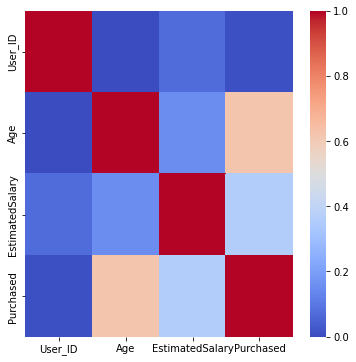

In [3]:
plt.subplots(figsize=(6, 6))
sns.heatmap(x.corr(), cmap='coolwarm')

In [4]:
X = data.drop(['Purchased' ,"Gender"],axis=1)
y = data['Purchased']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [6]:
print(X)
print('--------------------------------------------')
print(y)

      User_ID  Age  EstimatedSalary
0    15624510   19            19000
1    15810944   35            20000
2    15668575   26            43000
3    15603246   27            57000
4    15804002   19            76000
..        ...  ...              ...
395  15691863   46            41000
396  15706071   51            23000
397  15654296   50            20000
398  15755018   36            33000
399  15594041   49            36000

[400 rows x 3 columns]
--------------------------------------------
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
# Train the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [9]:
# Predict the test set results
y_pred = lr.predict(X_test)
y_pred


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        53
           1       0.88      0.56      0.68        27

    accuracy                           0.82        80
   macro avg       0.85      0.76      0.78        80
weighted avg       0.83      0.82      0.81        80



In [12]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)

Confusion matrix:
[[51  2]
 [12 15]]


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [14]:
# Compute the accuracy, error rate, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [15]:
print('Accuracy: ', accuracy)
print('Error rate: ', error_rate)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1-score: ', f1)


Accuracy:  0.825
Error rate:  0.17500000000000004
Precision:  0.8823529411764706
Recall:  0.5555555555555556
F1-score:  0.6818181818181819
